In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [3]:
df = pd.read_csv('kc-house-data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [4]:
def get_year(date):
    return date[:4]
df['yr_sail']=df['date'].apply(get_year).astype(int)
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sail
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,...,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0,0.0


Text(0.5, 1.0, 'Correlation matrix')

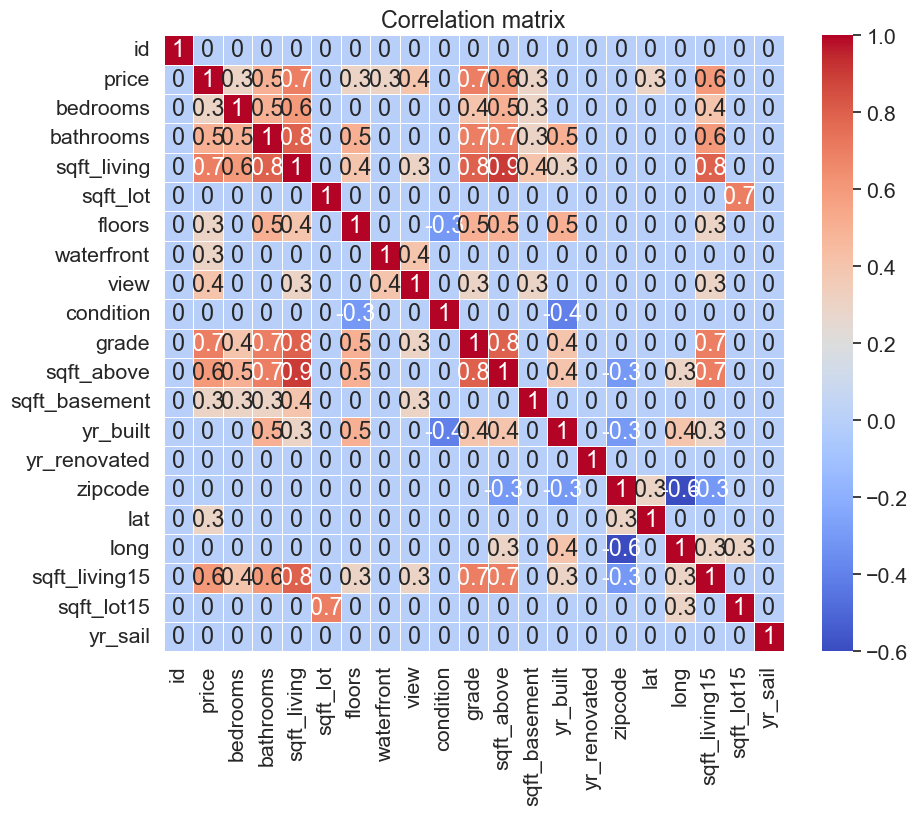

In [5]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')

Поскольку в задании указано провести оценку воздействия различных факторов на стоимость жилья, сосредоточимся только на корреляции с данным показателем.
1. Имеется выраженная корреляция стоимости с жилой площадью жилья и почти такая же с площадью жилья у 15 соседей. Однако, второй фактор можно исключить из анализа, так как между этими двумя факторами имеется сильная корреляция: соседи строят похожие дома примерно одинаковой площади.Такие же выводы можно сделать и об общей площади дома, которая очень сильно коррелирует с жилой.
2. Довольно сильную корреляцию можно выявить между стоимостью и таким показателем как оценка качества жилья по шкале grade - дома с более высокой оценкой имеют более высокую стоимость
3. Интересно, что при этом с оценкой состояния condition корреляции не выявлено - возможно следует провести более тщательный анализ данного показателя.
4. Так же показана определенная зависимость стоимости жилья от количества ванных, тогда как количество спальных комнат, так же как и наличие подвала вероятно в меньшей степени влияют на стоимость жилья. Кстати, интересно отметить, что у более новых домов - количество ванных больше (что может быть связано с изменениями представлений людей о комфорте: раньше казалось достаточным одной ванной на семью, теперь же каждому хочется иметь свою собственную).
5. Еще одним фактором, который оказывает определенное влияние на стоимость является вид
Таким образом, для дальнейшего анализа мы будем использовать следующие факторы: жилая площадь, качество жилья по шкале grade, качество жилья по шкале condition, количество ванных комнат и вид.

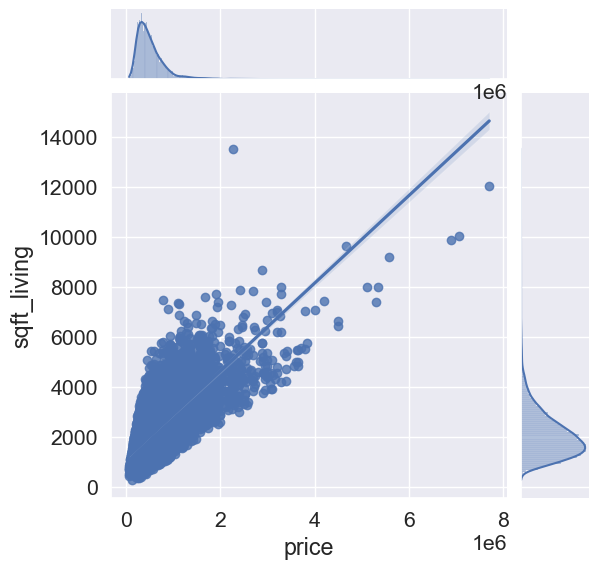

In [6]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')

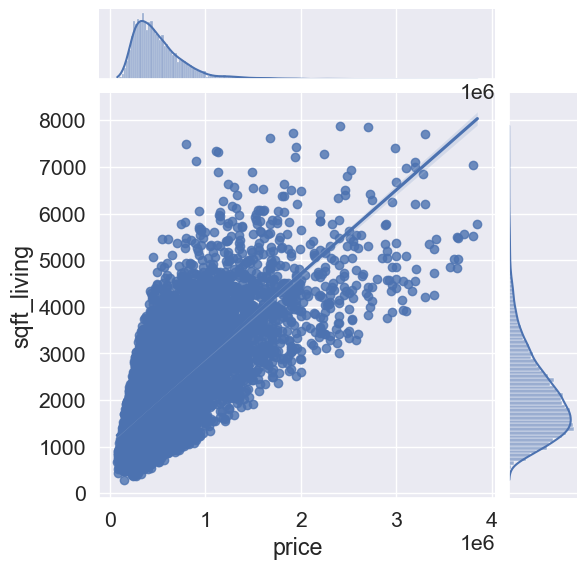

In [7]:
df_cut = df[df['sqft_living'] < 8000]
df_cut = df_cut[df_cut['price'] < 4000000]
sns.jointplot(x=df_cut['price'], y=df_cut['sqft_living'], kind='reg')

Вывод: на графике можно увидеть довольно сильную корреляцию между ценой и площадью, и у домов с большей площадью эта корреляция выше. Однако нельзя с уверенностью утверждать, что только площадь оказывает значение на стоимость, поскольку внутри каждого диапазона площадей имеется существенный разброс по ценам. Так дома с площадью в 3000 м ку могут стоить от 300 тысяч до 2,4 млн.



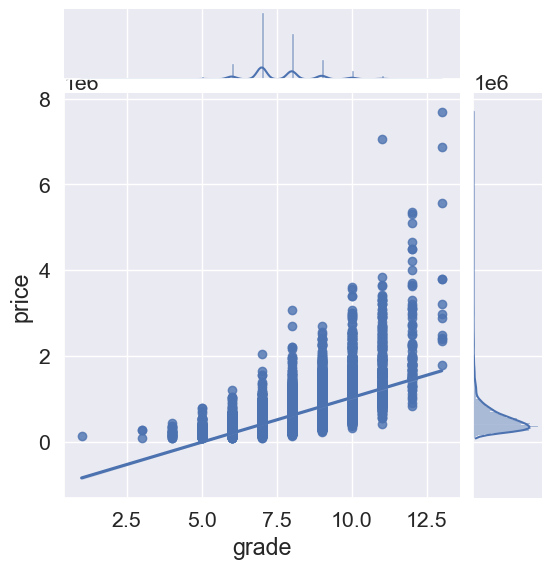

In [8]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg')

График имеет такой вид, поскольку не смотря не то, что grade имеет цифровое выражение, но все-такие имеет в определенной степени качественную характеристику. Тем не менне хорошо прослеживается зависимость стоимости от градации

Text(0, 0.5, 'price')

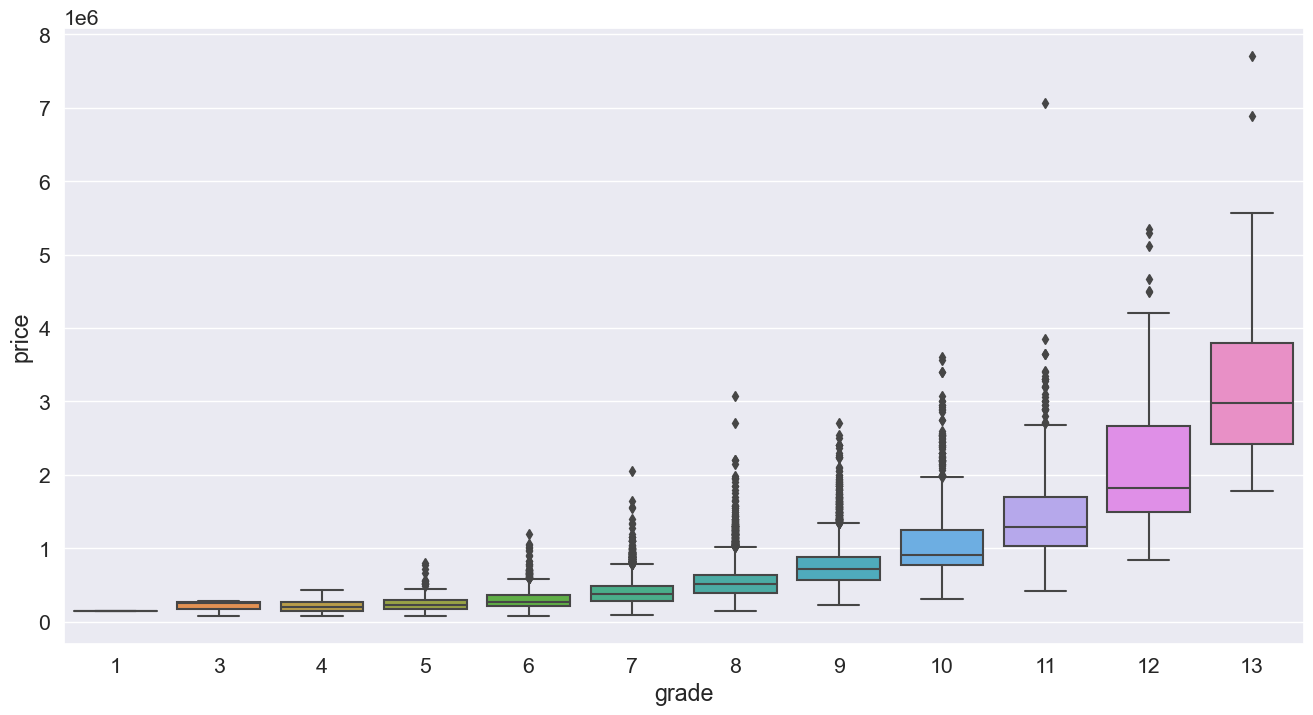

In [10]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['grade'], y=df['price'])

plt.xlabel('grade')
plt.ylabel('price')


На графике хорошо видна прямая зависимость между медианной стоимостью и оценкой по шкале grade. Можно отметить, что чем выше оценка - тем больше разброс цен внутри категории. Наибольшие выпадения по цене всегда отмечаются в большую сторону стоимости, т.е. найти дорогой дом со средним состоянием куда вероятнее, чем дом в отличном состоянии по низкой цене.

Text(0, 0.5, 'price')

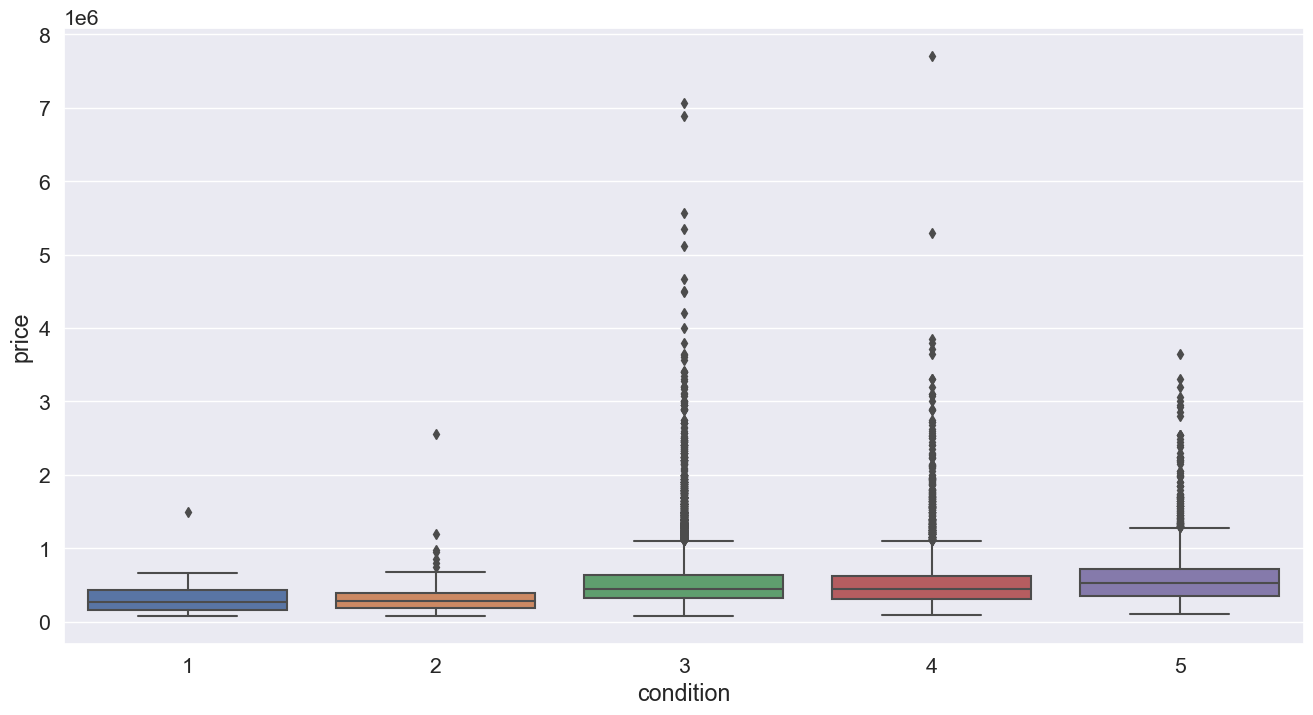

In [11]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['condition'], y=df['price'])

plt.xlabel('condition')
plt.ylabel('price')

Что касается, зависимости цены от состояния по 5 бальной шкале, то можно отметить, что только состояние ниже 3 оказывает влияние на медианную стоимость, тогда как дома с сотоянием 3,4,5 имеют примерно одинаковую медиану и разброс цен. Можно преобразовать данные, присвоив домам с баллами 1,2 оценку 0, а 3,4,5 - оценку 1.

In [12]:
def  good_bad(date):
    if date < 3:
        return 0
    else:
        return 1
df['good_bad']=df['condition'].apply(good_bad).astype(int)    

Text(0, 0.5, 'price')

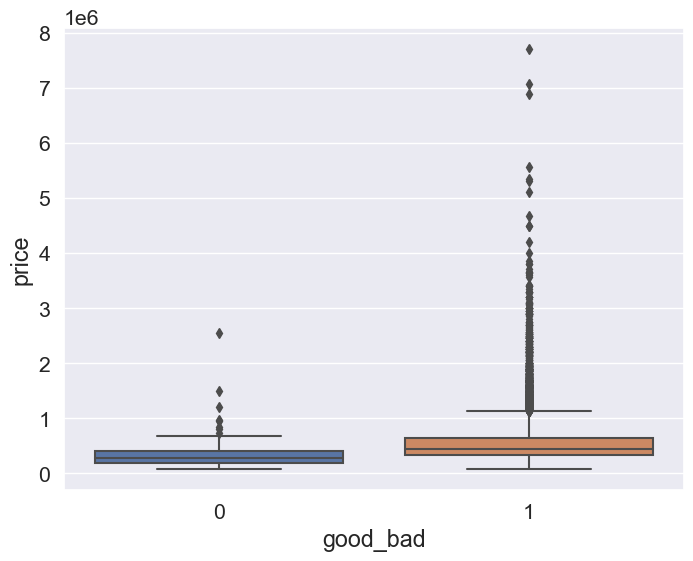

In [13]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['good_bad'], y=df['price'])

plt.xlabel('good_bad')
plt.ylabel('price')

И такое преобразование, хоть и не позволяет однозначно утверждать о различиях между выборками (для этого необходимо провести статистический анализ), тем не менее, можно говорить о том, что если дом имеет оценку выше 3 балов, то влияние данного фактора уже незначительно.

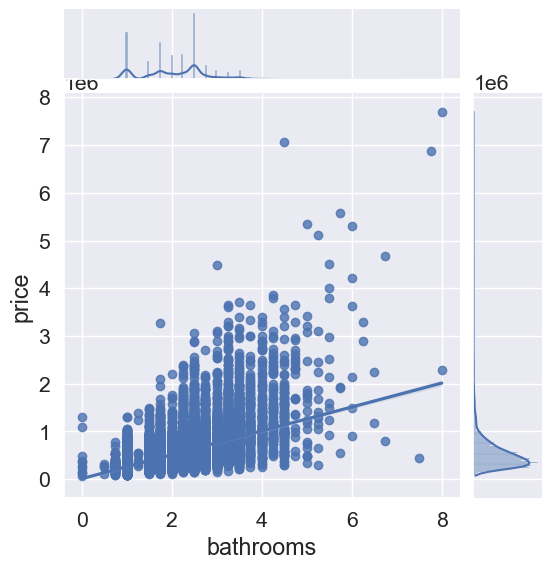

In [14]:
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg')

Text(0, 0.5, 'price')

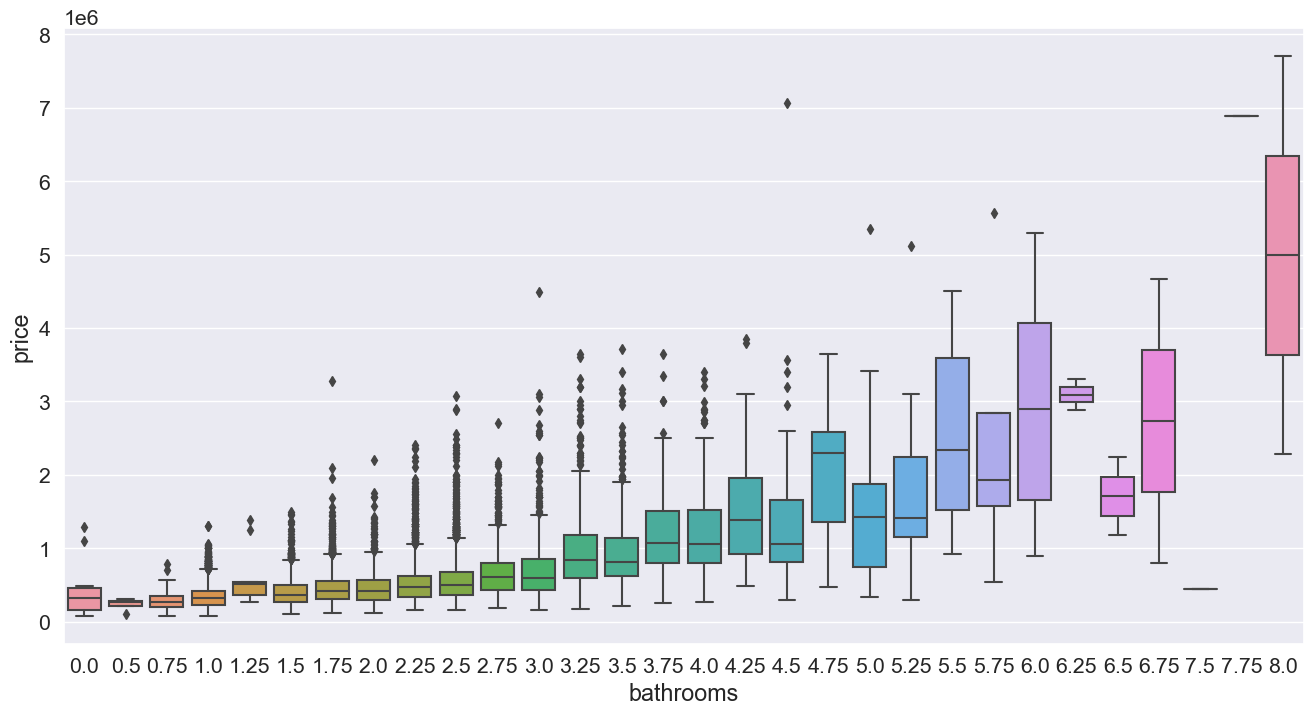

In [15]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['bathrooms'], y=df['price'])

plt.xlabel('bathrooms')
plt.ylabel('price')

In [16]:
df['bathrooms_round']=df['bathrooms'].apply(lambda x: round(x)).astype(int) 
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sail,good_bad,bathrooms_round
14032,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,...,2005,0,98006,47.5571,-122.140,2840,20809,2014,1,4
6469,8732190460,20150505T000000,260000.0,3,1.75,1680,8725,1.0,0,0,...,1978,0,98023,47.3107,-122.397,2020,8352,2015,1,2
3544,5379802816,20150224T000000,197000.0,4,1.00,1360,11175,1.0,0,0,...,1961,0,98188,47.4551,-122.272,1340,9702,2015,1,1
8177,1257200115,20140521T000000,1003000.0,4,2.75,2290,6120,2.0,0,0,...,1926,0,98115,47.6746,-122.327,1910,4590,2014,1,3
17652,1773100620,20150505T000000,350000.0,5,3.00,2320,8400,1.0,0,0,...,1963,0,98106,47.5570,-122.365,1200,4800,2015,1,3


Text(0, 0.5, 'price')

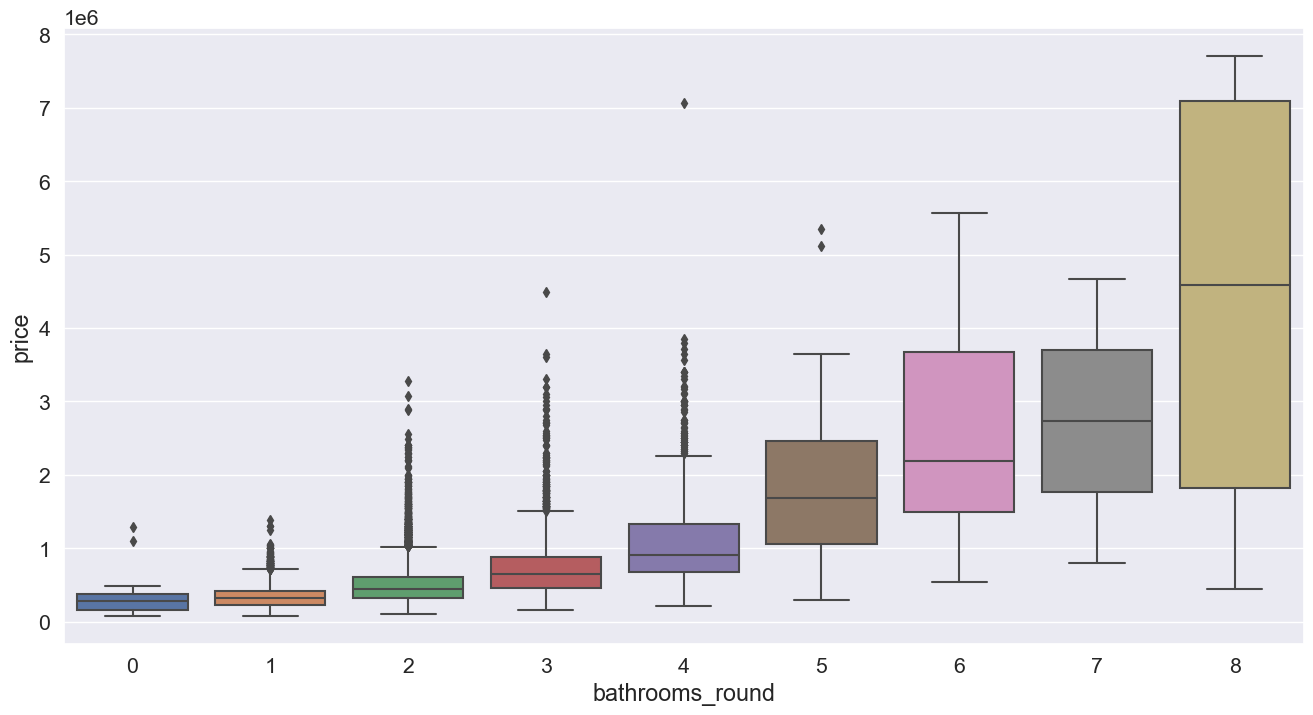

In [17]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['bathrooms_round'], y=df['price'])

plt.xlabel('bathrooms_round')
plt.ylabel('price')

На данном графике зависимость стала более выраженной. При этом можно отметить, что чем больше ванных комнат - тем шире ценовой диапазон.

Text(0, 0.5, 'price')

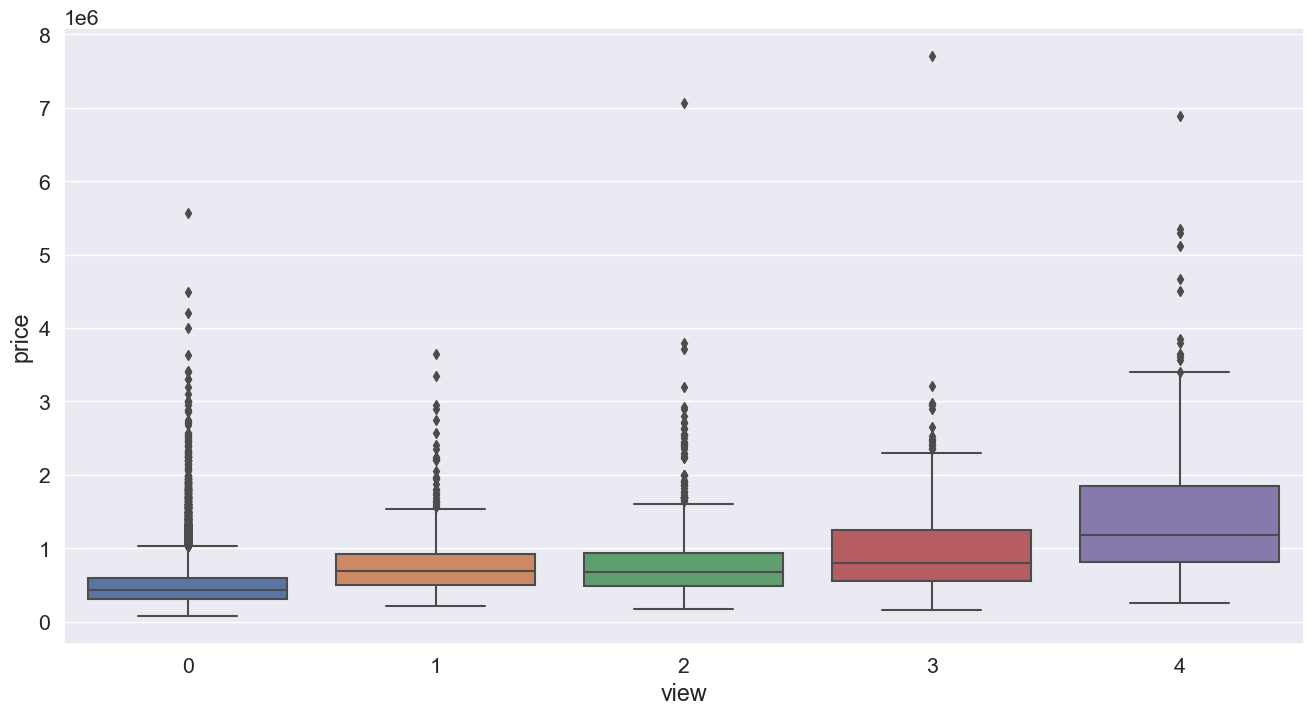

In [18]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['view'], y=df['price'])

plt.xlabel('view')
plt.ylabel('price')

Как и предполагалось - корреляция между видом и стоимостью низкая, однако плохой вид из окна может снизить стоимость, а действительно хороший - поднять.

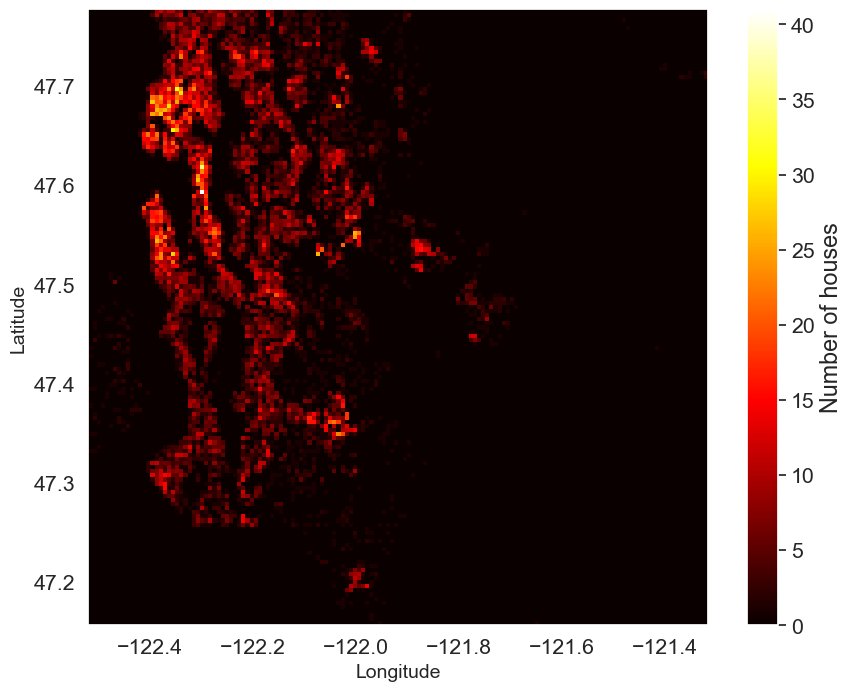

In [19]:
plt.figure(figsize = (10,8))
plt.hist2d(df.long, df.lat, bins=150, cmap='hot')
plt.colorbar().set_label('Number of houses')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.show()

In [20]:
min_long = -122.53
max_long = -121.38

min_lat = 47.04
max_lat = 48.01

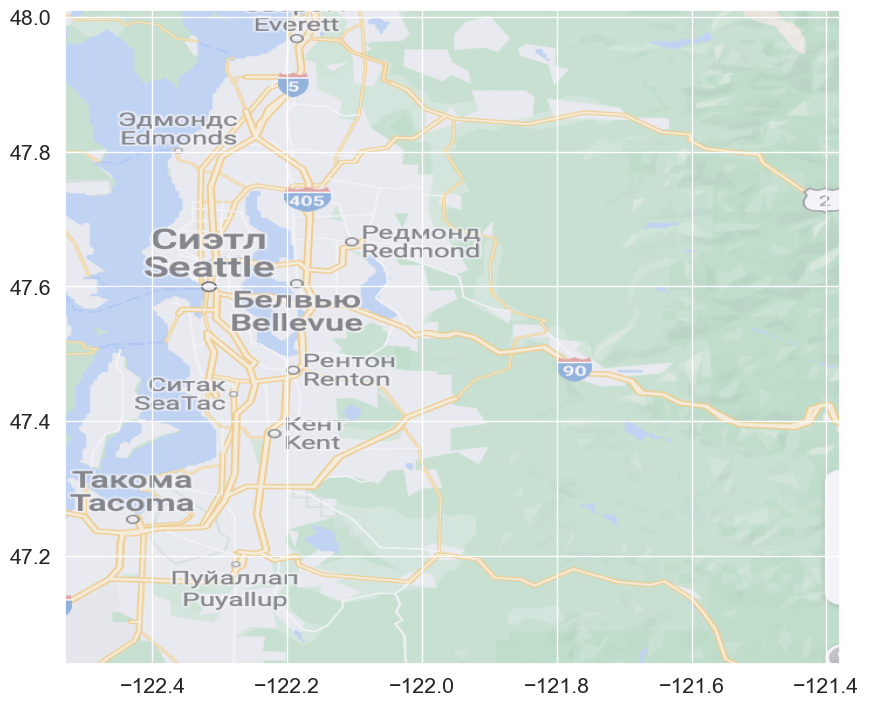

In [21]:
import matplotlib.image as img
wa_map = img.imread('wa.png')

plt.figure(figsize=(10, 10))
plt.imshow(wa_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

Text(0.5, 1.0, 'Homes geography')

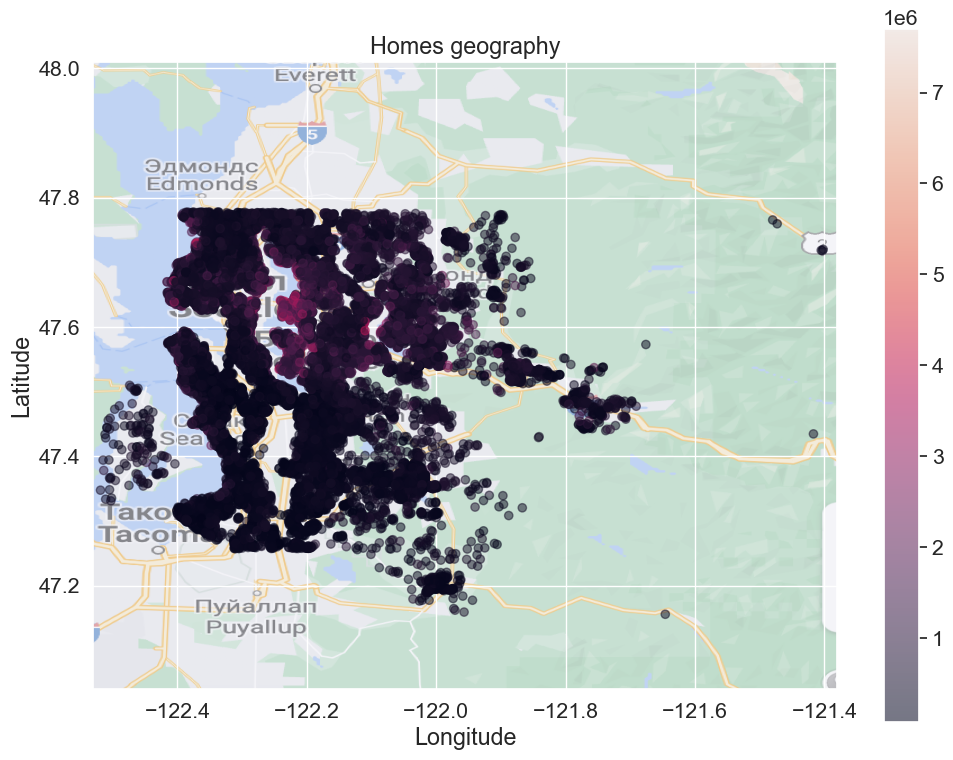

In [22]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['long'], df['lat'], alpha=0.5, c=df['price'])

plt.imshow(wa_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")

На карте видно, что месторасположение тоже имеет значение - в среднем дома дороже в Беллвью и Рендмонде

Выводы
1. Цены на жилье напрямую зависят от площади жилья, однако разброс цен выше для домов с маленькой и средней площадью, где значение на цену оказывают и другие факторы.
2. Имеется прямая зависимость между медианной стоимостью и оценкой по шкале grade. Можно отметить, что чем выше оценка - тем больше разброс цен внутри категории. Наибольшие выпадения по цене всегда отмечаются в большую сторону стоимости, т.е. найти дорогой дом со средним состоянием куда вероятнее, чем дом в отличном состоянии по низкой цене.
3. Зависимость цены от состояния по 5 бальной шкале выражено слабо, однако можно отметить, что только состояние ниже 3 оказывает влияние на медианную стоимость несколько снижая ее.
4. Цена также зависит от количества ванных комнат: при этом, если ванных меньше 3, то различия по медианной цене между разными категориями невелики, однако при количестве ванных больше 4 тенденция становится более выраженной. При этом чем больше ванных комнат - тем шире ценовой диапазон.
5. Еще одним фактором влияющим, на стоимость дома может стать вид из окна. Однако только совсем ужасный вид приводит к значимому снижению стоимости и только самый хороший может поднять цену.
6. И хотя прямых корреляций нет, но если постороить распределение цен домов, то можно отметить, что самые дорогие дома можно найти в Беллвью, Рендмонде и Сиэтлле.